In [12]:
import pandas as pd
from preprocess import preprocess_svr_mlp
import numpy as np
from generate import recreate_map

def split_scale_data(data):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    l = list(data.columns)
    l.pop(0)
    Y = (data["hl_"])
    X = data[l]
    scaled_X = X
    X_train, X_val, y_train, y_val = train_test_split(scaled_X, Y, test_size=0.2, random_state=0)
    return X_train, X_val, y_train, y_val,l


In [10]:
data = pd.read_csv("./data/svm_mlp_data.csv")
data = preprocess_svr_mlp(data)
X_train, X_val, y_train, y_val,l= split_scale_data(data)

In [11]:
from catboost import CatBoostRegressor, Pool
feature_names = ["sla","sst","uera","vera","u","v","sw"]
model = CatBoostRegressor(iterations=25000, 
                          depth=2, 
                          learning_rate=0.1, 
                          loss_function='RMSE',train_dir="/local/tmp/1/abrini/Chl_project/tensorboardlogs/",)


In [13]:
model.fit(X_train, y_train,verbose=False,
          plot=True,column_description=l,early_stopping_rounds=1000,snapshot_file="./models/snp_cat",)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

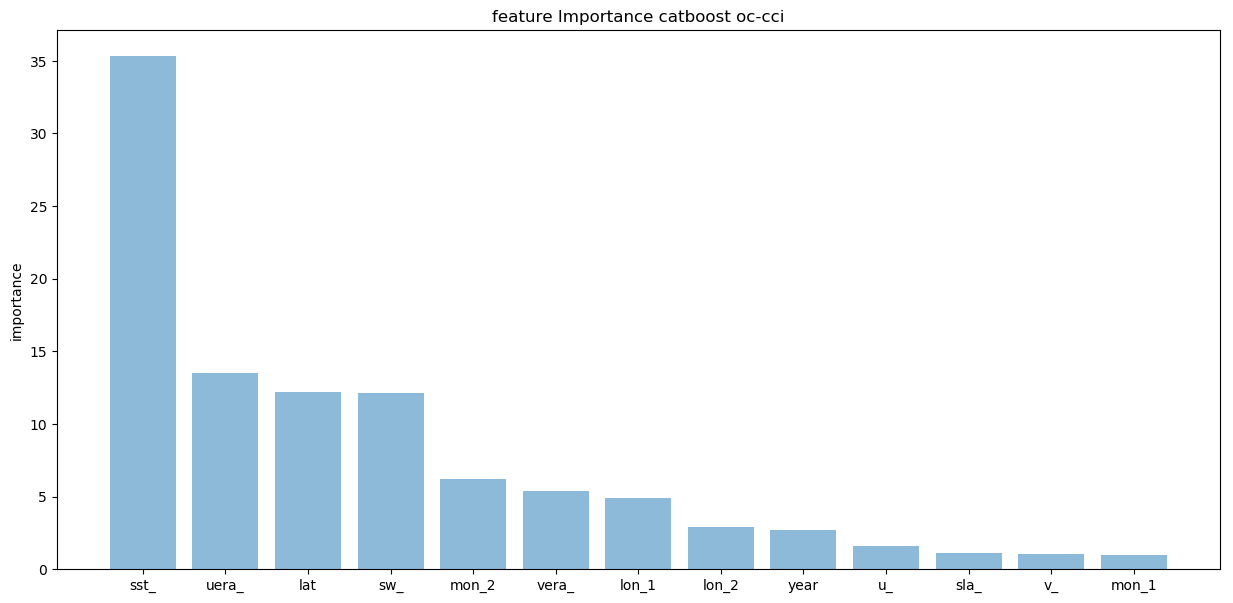

In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

d = pd.Series(model.feature_importances_,index=l)
d = d.sort_values(ascending=False)
objects = d.index
y_pos = np.arange(len(objects))
performance = d

plt.figure(figsize=(15,7))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('importance')
plt.title('feature Importance catboost oc-cci')

plt.show()

In [23]:
data = pd.read_csv("./data/gc_flattened_data.csv")
data = preprocess_svr_mlp(data)
X_train, X_val, y_train, y_val,l,s = split_scale_data(data)

In [24]:
model.fit(X_train, y_train,verbose=False,
          plot=True,column_description=l,early_stopping_rounds=1000,snapshot_file="./models/snp_cat2",)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

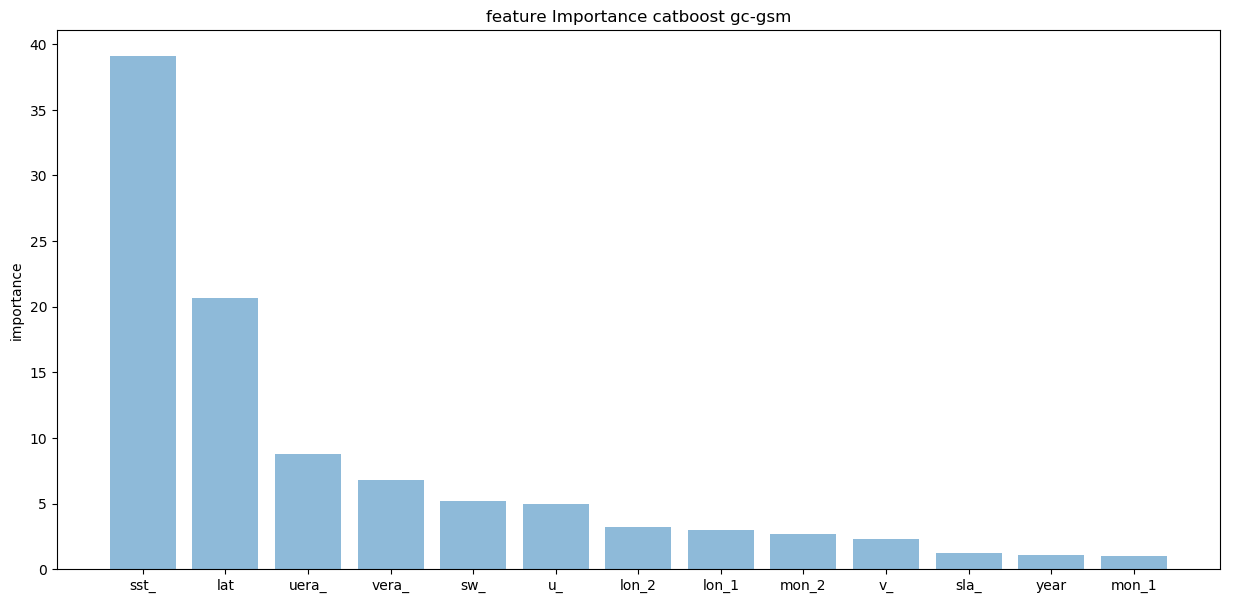

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

d = pd.Series(model.feature_importances_,index=l)
d = d.sort_values(ascending=False)
objects = d.index
y_pos = np.arange(len(objects))
performance = d

plt.figure(figsize=(15,7))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('importance')
plt.title('feature Importance catboost gc-gsm')

plt.show()

In [ ]:
data_cat = recreate_map(model, "cat_occci_fixced1998-2016",0,1,start=1998,end=2016,lat_sin=True,verbose=True)